In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/Iris.csv")

In [ ]:
def logistic_function(x):
  y = 1/(1+np.exp(-x))
  return y

In [ ]:
def test_logistic_function():
  x_scalar = 0
  expected_output_scalar = round(1/(1+np.exp(0)),3)
  assert round(logistic_function(x_scalar),3) == expected_output_scalar, "test failed for 0 scalar input"

  x_scalar = 2
  expected_output_scalar = round(1/(1+np.exp(-2)),3)
  assert round(logistic_function(x_scalar),3) == expected_output_scalar, "test failed for plus scalar input"

  x_scalar = -3
  expected_output_scalar = round(1/(1+np.exp(-(-3))),3)
  assert round(logistic_function(x_scalar),3)  == expected_output_scalar, "test failed for negative scalar input"

  x_array = np.array([0,2,-3])
  expected_output_array = np.array([0.5,0.881,0.047])

  assert np.all(np.round(logistic_function(x_array),3) == expected_output_array), "Test failed for  numpy array input"

  print("All tests passed!")

test_logistic_function()




All tests passed!


In [ ]:
def log_loss(y_true, y_pred):
  y_pred = np.clip(y_pred, 1e-10, 1-1e-10)
  loss = -y_true*np.log(y_pred) - ((1-y_true)*np.log(1-y_pred))
  return loss

In [ ]:
y_true, y_pred = 0,0.1
print(f"log loss({y_true},{y_pred}) => {log_loss(y_true,y_pred)}")

log loss(0,0.1) => 0.10536051565782628


In [ ]:
y_true, y_pred = 1,0.9
print(f"log loss({y_true},{y_pred}) => {log_loss(y_true,y_pred)}")

log loss(1,0.9) => 0.10536051565782628


In [ ]:
def test_log_loss():
  y_true = 1
  y_pred = 1
  expected_loss = 0.0
  assert np.isclose(log_loss(y_true,y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
  y_true = 0
  y_pred = 0
  expected_loss = 0.0
  assert np.isclose(log_loss(y_true,y_pred), expected_loss), "Test failed for perfect prediction (y_true=1, y_pred=1)"
  y_true = 1
  y_pred = 0
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  # Test case 5: Partially correct prediction
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=0, y_pred=0.2)"
  print("All tests passed!")
# Run the test case
test_log_loss()




All tests passed!


In [ ]:
def cost_function(y_true,y_pred):
  assert len(y_true) == len(y_pred)
  n = len(y_pred)
  y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

  loss_vec = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  cost = np.sum(loss_vec) / n

  return cost

In [ ]:
def test_cost_function():
  y_true = np.array([1,0,1])
  y_pred = np.array([0.9,0.1,0.8])
  expected_cost = (
      -(1*np.log(0.9) + (1-1)*np.log(1-0.9))
      -(0*np.log(0.1) + (1-0)*np.log(1-0.1))
      -(1*np.log(0.8) + (1-1)*np.log(1-0.8))
  ) / 3
  result = cost_function(y_true, y_pred)
  assert np.isclose(result, expected_cost, atol=1e-6)
  print("test passed for simple case!")
test_cost_function()

test passed for simple case!


In [ ]:
def costfunction_logreg(X,y,w,b):
  n,d = X.shape
  assert len(y) == n, "Number of observations and targets do not match."
  assert len(w) == d, "Number of features and weights do not match."
  z = np.dot(X,w) +b
  y_pred = logistic_function(z)
  cost = cost_function(y,y_pred)
  return cost

In [ ]:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")

cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784907


Task 5

In [ ]:
def compute_gradient(X,y,w,b):
  n,d = X.shape
  assert len(y) == n, f"Expected y to have {n} ellements, but got {len(y)}"
  assert len(w) == d, f"Expected w to have {d} elements, but got {len(y)}"
  z = np.dot(X,w) +b
  y_pred = logistic_function(z)
  grad_w = (1/n)* np.dot(X.T, (y_pred -- y))
  grad_b = (1/n) * np.sum(y_pred-y)
  return grad_w, grad_b

In [ ]:
# Simple test case
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1
try:
  grad_w, grad_b = compute_gradient(X, y, w, b)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [ 5.00008351 24.99991649]
grad_b: 0.4999916492890759


In [ ]:
import numpy as np

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(), b))
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")
    print(cost_history)

    return w, b, cost_history, params_history


In [ ]:
def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])
    y = np.array([1, 0])
    w = np.zeros(X.shape[1])
    b = 0.0
    alpha = 0.1
    n_iter = 100

    w_out, b_out, cost_history, _ = gradient_descent(
        X, y, w, b, alpha, n_iter, show_cost=False, show_params=False
    )

    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, (float, np.floating)), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"

    print("All tests passed!")
# test_gradient_descent()


In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize = (9, 6))
# plt.plot(cost_history)
# plt.xlabel("Iteration", fontsize = 14)
# plt.ylabel("Cost", fontsize = 14)
# plt.title("Cost vs Iteration", fontsize = 14)
# plt.tight_layout()
# plt.show()

Task 7

In [41]:
def prediction(X, w, b, threshold=0.5):

    # Compute predicted probabilities
    z = np.dot(X, w) + b
    y_test_prob = 1 / (1 + np.exp(-z))   # sigmoid

    # Apply threshold to get class labels
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred



In [43]:
def test_prediction():
  X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]]) # Shape (3, 2)
  w_test = np.array([1.0, -1.0]) # Shape (2,)
  b_test = 0.0 # Scalar bias
  threshold = 0.5 # Default threshold
  # Updated expected output
  expected_output = np.array([0, 1, 1])
  # Call the prediction function
  y_pred = prediction(X_test, w_test, b_test, threshold)
  # Assert that the output matches the expected output
  assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
  print("Test passed!")
test_prediction()


Test passed!


8:Task to do

In [44]:
def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.
    """
    # Confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data_pima_diabetes = pd.read_csv(url, names=columns)

In [50]:
# Data cleaning
columns_to_clean = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [52]:
X = data_pima_diabetes.drop(columns=["Outcome"]).values
y = data_pima_diabetes["Outcome"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training Logistic Regression Model:
Iteration 0: Cost = 0.706007
Iteration 100: Cost = 1.236505
Iteration 200: Cost = 1.393559
Iteration 300: Cost = 1.483443
Iteration 400: Cost = 1.541668
Iteration 500: Cost = 1.581961
Iteration 600: Cost = 1.611051
Iteration 700: Cost = 1.632634
Iteration 800: Cost = 1.648931
Iteration 900: Cost = 1.661376
Iteration 999: Cost = 1.670864
[np.float64(0.7060072079880811), np.float64(0.7188837987867389), np.float64(0.7316920885051688), np.float64(0.7443641875755249), np.float64(0.7568473362702363), np.float64(0.7691017846238433), np.float64(0.7810986624013502), np.float64(0.792817999878203), np.float64(0.8042469794144909), np.float64(0.8153784434022815), np.float64(0.8262096517623341), np.float64(0.8367412654585777), np.float64(0.8469765258273407), np.float64(0.8569205986764672), np.float64(0.8665800542982081), np.float64(0.8759624580432794), np.float64(0.8850760499457682), np.float64(0.893929495561211), np.float64(0.902531693452855), np.float64(0.91089

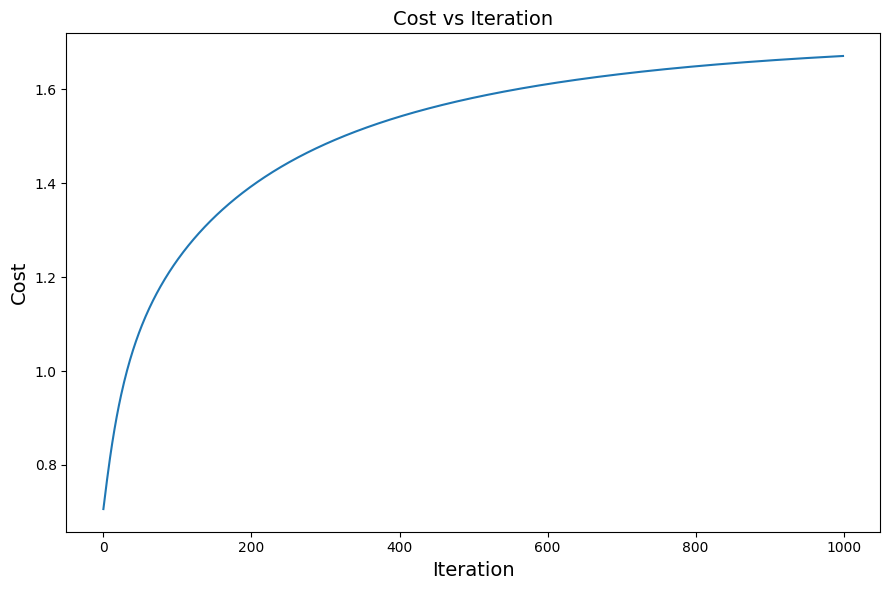

In [54]:
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter,
show_cost=True, show_params=False)
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [56]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)
# Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 1.7014
Test Loss (Cost): 1.7290



Test Accuracy: 33.12%

Confusion Matrix:
[[47 53]
 [50  4]]
Precision: 0.07
Recall: 0.07
F1-Score: 0.07


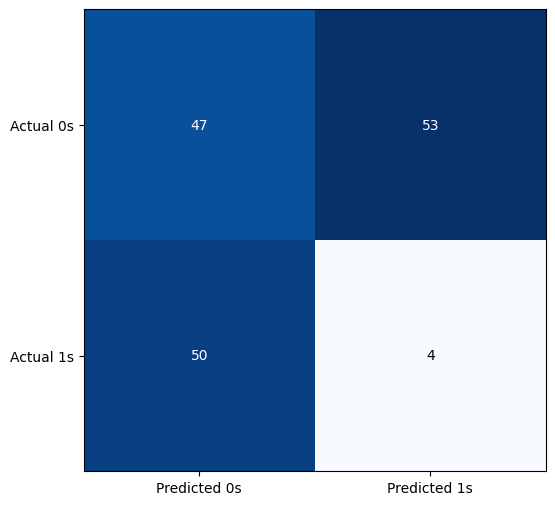

In [61]:

test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
metrics = evaluate_classification(y_test, y_test_pred)
confusion_matrix = metrics["confusion_matrix"]
precision = metrics["precision"]
recall = metrics["recall"]
f1_score = metrics["f1_score"]

print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix, cmap='Blues')
ax.grid(False)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'])
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j],
                ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max()/2 else 'black')

plt.show()
